In [2]:
#Projeto de ciência de dados - Previsão de Impactos Socioeconômicos d Desmatamento no Pará
## 1. Introdução - Este projeto tem como objetivo analisar dados relacionados ai desmatamento no estado do Pará e prever impactos socioeconômicos utilizando técnica de ciÊncia de dados.

## 2. Bibliotecas Utilizadas

In [6]:
#Bibliotecas principais
!pip install seaborn
!pip install scikit-learn
import pandas as pd
import numpy as np

#Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#Modelagem
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metric import mean_squared_error, r2_score

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 6.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 14.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 17.6 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   --- ------------------------------------ 3.9/41.0 MB 19.0 MB/s eta 0:00:02
   ------ --------------------------------- 6.8/41.0 MB 18.5 MB/s eta 0:00:02
   ------ --------------------------------- 7.1/41.0 MB 11.6 MB/s eta 0:00:03
   ------ --------------------------------- 7.1/41.0 MB 11.6 MB/s eta 0:00:03
   ------- -------------------------------- 8.1/41.0 MB 8.0 MB/s eta 0:00:05
   --------- ------------------------------ 9.4/41.0 MB 7.7 MB/s eta 0:00:05
   

ModuleNotFoundError: No module named 'sklearn.metric'

In [ ]:
#Carregamento dos Dados

In [25]:
import pandas as pd
import os

pasta = 'C:/Users/Roque/Desktop/Zetta'
arquivos = os.listdir(pasta)

dataframes = []

for f in arquivos:
    caminho = os.path.join(pasta, f)
    try:
        if f.endswith('.xlsx') and not f.startswith('~$'):
            df = pd.read_excel(caminho, engine='openpyxl')
        elif f.endswith('.csv'):
            df = pd.read_csv(caminho)
        else:
            print(f"Pulado (formato não suportado): {f}")
            continue
        df['arquivo_origem'] = f  # adicionar nome do arquivo à tabela
        dataframes.append(df)
        print(f"Arquivo lido com sucesso: {f}")
    except Exception as e:
        print(f"Erro ao ler {f}: {e}")

if dataframes:
    df_total = pd.concat(dataframes, ignore_index=True)
    print("Concatenação concluída.")
else:
    print("Nenhum arquivo válido para concatenar.")

Arquivo lido com sucesso: Evolução_da_área_de_desmatamento.csv
Arquivo lido com sucesso: Evolução_do_total_de_alertas.csv
Arquivo lido com sucesso: Evolução_mensal_da_área_de_desmatamento.csv
Arquivo lido com sucesso: Ranking_de_Biomas.csv
Arquivo lido com sucesso: Ranking_de_Estados.csv
Arquivo lido com sucesso: Ranking_dos_10_Municípios.csv
Concatenação concluída.


In [13]:
#Exploração e limpeza dos dados

In [29]:
df.info()
df.describe()
df.isnull().sum()

df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #               10 non-null     int64  
 1   Nome            10 non-null     object 
 2   Área Total      10 non-null     float64
 3   arquivo_origem  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


In [31]:
## 5. Análise Exploratória de Dados

In [32]:
df.columns

Index(['#', 'Nome', 'Área Total', 'arquivo_origem'], dtype='object')

In [35]:
#Evolução da área de desmatamento

In [46]:
caminho_arquivo = 'C:/Users/Roque/Desktop/Zetta/Evolução_da_área_de_desmatamento.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lê o arquivo (suponha que esteja no Excel local ou exportado do Google Sheets)
df = pd.read_csv('C:/Users/Roque/Desktop/Zetta/Evolução_da_área_de_desmatamento.csv', header=None)

# Pega a primeira linha como anos e a segunda como área desmatada
df = pd.DataFrame({
    'ano': df.iloc[0, :6].values,  # Pega os anos (2019 a 2024)
    'area_desmatada': df.iloc[1, :6].values  # Pega os valores correspondentes
})

# Remove vírgulas ou pontos extras (ex: "1.4.702.007.221" → 14702007221)
df['area_desmatada'] = df['area_desmatada'].astype(str).str.replace('.', '').astype(float)

print(df)

      ano  area_desmatada
0  2019.0    3.003240e+16
1  2020.0    3.858820e+15
2  2021.0    4.702007e+15
3  2022.0    4.878996e+15
4  2023.0    1.846868e+16
5  2024.0    1.569968e+16


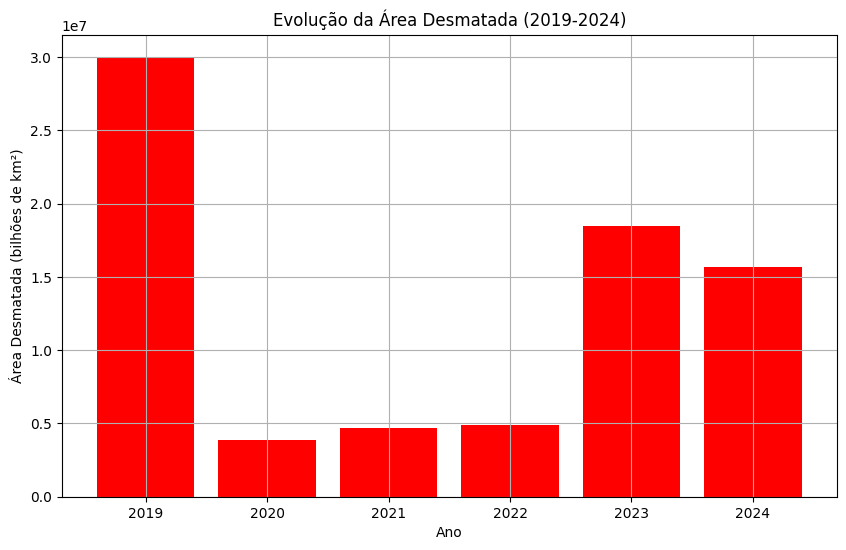

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['ano'], df['area_desmatada'] / 1e9, color='red')  # Divide por 1 bilhão para escala em km²
plt.title('Evolução da Área Desmatada (2019-2024)')
plt.xlabel('Ano')
plt.ylabel('Área Desmatada (bilhões de km²)')
plt.grid(True)
plt.show()

In [48]:
#Evolução total de alertas

In [49]:
caminho_arquivo = 'C:/Users/Roque/Desktop/Zetta/Evolução_do_total_de_alertas.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lê o arquivo (suponha que esteja no Excel local ou exportado do Google Sheets)
df = pd.read_csv('C:/Users/Roque/Desktop/Zetta/Evolução_do_total_de_alertas.csv', header=None)

# Pega a primeira linha como anos e a segunda como área desmatada
df = pd.DataFrame({
    'ano': df.iloc[0, :6].values,  # Pega os anos (2019 a 2024)
    'area_desmatada': df.iloc[1, :6].values  # Pega os valores correspondentes
})

# Remove vírgulas ou pontos extras (ex: "1.4.702.007.221" → 14702007221)
df['area_desmatada'] = df['area_desmatada'].astype(str).str.replace('.', '').astype(float)

print(df)

    ano  area_desmatada
0  2019         18442.0
1  2020         25485.0
2  2021         23460.0
3  2022         21658.0
4  2023         14062.0
5  2024         12308.0


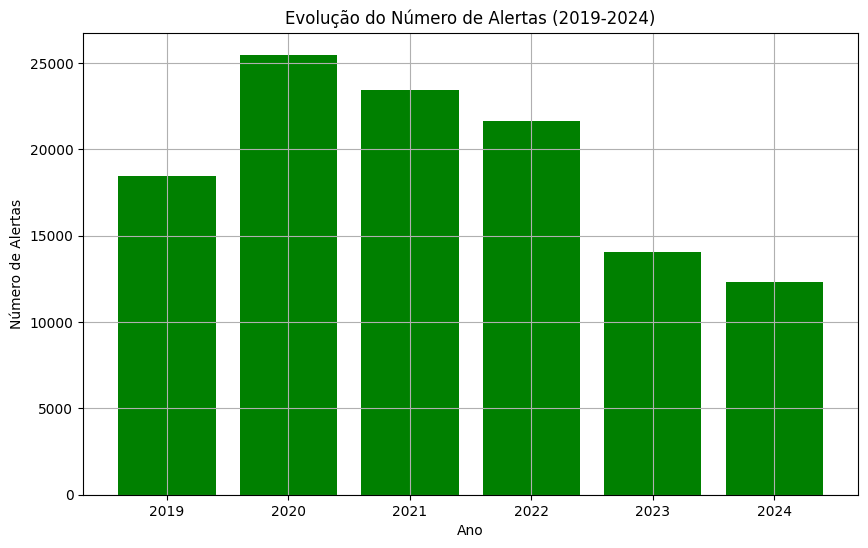

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['ano'], df['area_desmatada'], color='green') 
plt.title('Evolução do Número de Alertas (2019-2024)')
plt.xlabel('Ano')
plt.ylabel('Número de Alertas')
plt.grid(True)
plt.show()

In [53]:
#Evolução Mensal da Área de Desmatamento

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo CSV (ajuste o caminho conforme necessário)
caminho_arquivo = 'C:/Users/Roque/Desktop/Zetta/Evolução_mensal_da_área_de_desmatamento.csv'
df = pd.read_csv(caminho_arquivo, header=None)

# Remove linhas/colunas vazias ou irrelevantes (ajuste conforme o arquivo real)
df = df.dropna(how='all').dropna(axis=1, how='all')

# Define a primeira linha como cabeçalho (nomes dos meses)
df.columns = df.iloc[0]
df = df[1:]  # Remove a linha de cabeçalho duplicada

# Renomeia a coluna de anos (supondo que a primeira coluna seja "Ano")
df = df.rename(columns={df.columns[0]: 'Ano'})

# Limpa os valores (remove pontos extras e converte para float)
for col in df.columns[1:]:  # Ignora a coluna 'Ano'
    df[col] = df[col].astype(str).str.replace('.', '').astype(float)

print(df.head())

0    NaN           1.0           2.0           3.0           4.0   \
1  2019.0  1.135942e+15  2.574123e+14  6.908528e+15  1.277281e+16   
2  2020.0  4.291906e+15  1.351107e+16  1.675359e+16  2.299305e+15   
3  2021.0  1.000458e+16  1.429332e+16  4.726509e+15  3.218125e+15   
4  2022.0  8.838741e+15  1.701889e+16  2.973316e+15  2.538300e+16   
5  2023.0  6.555646e+15  1.114190e+16  1.056636e+16  1.528172e+16   

0          5.0           6.0           7.0           8.0           9.0   \
1  2.267288e+16  7.175353e+14  5.138255e+14  4.968960e+16  3.677627e+16   
2  1.579859e+15  5.978851e+16  4.488567e+15  4.862982e+15  5.246847e+15   
3  4.482771e+15  4.490913e+15  8.773530e+15  8.890522e+15  4.986990e+15   
4  4.884119e+16  6.387438e+16  6.094072e+15  8.604044e+15  6.552212e+16   
5  1.407061e+16  1.707069e+15  1.216886e+16  2.794727e+16  3.259084e+16   

0          10.0          11.0          12.0  
1  1.987893e+15  9.296121e+15  5.259212e+14  
2  3.622502e+15  1.609850e+16  1.581069e+1

Primeiras linhas do arquivo:
,1,2,3,4,5,6,7,8,9,10,11,12
2019,1.135.942.048.676.310,257.412.319.894.135,6.908.528.014.212.840,12.772.814.864.218.200,22.672.875.224.761.600,717.535.329.958.126,513.825.548.389.554,49.689.597.111.962.700,36.776.274.093.322.400,1.987.892.758.793.380,9.296.120.539.188.380,525.921.170.258.522
2020,4.291.906.471.148.130,13.511.070.627.719.100,16.753.593.556.150.700,22.993.052.892.759.400,1.579.859.243.953.970,59.788.510.420.031.800,4.488.566.782.900.690,4.862.981.714.493.780,5.246.846.513.496.330,3.622.502.086.810.760,16.098.501.867.175.100,15.810.691.724.315.200
2021,10.004.580.551.728.600,14.293.324.913.531.500,4.726.509.216.826.400,3.218.124.853.864.310,4.482.771.000.601.350,4.490.913.018.617.030,8.773.530.443.487.310,8.890.521.553.075.310,4.986.989.960.017.050,300.485.343.882.218,16.011.588.665.947.300,4.149.093.210.220.330
2022,8.838.740.598.291.150,17.018.889.083.124.600,29.733.163.281.321.500,25.382.998.348.504.300,48.841.189.702.659.800,63.874.381.327

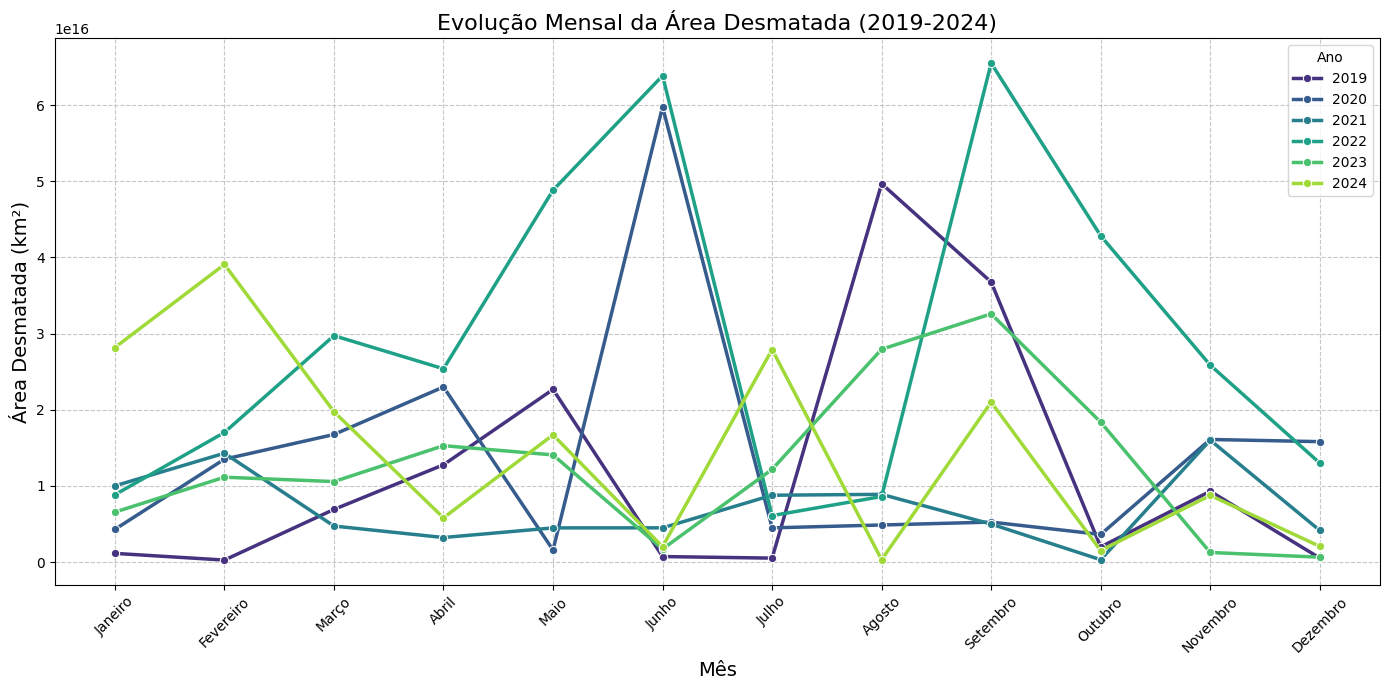

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def clean_value(value):
    """Converte valores formatados com pontos para float"""
    try:
        return float(str(value).replace('.', '').replace(',', '.'))
    except:
        return None

# Caminho correto do arquivo
caminho = 'C:/Users/Roque/Desktop/Zetta/Evolução_mensal_da_área_de_desmatamento.csv'

# 1. VERIFICAÇÃO INICIAL DO ARQUIVO
try:
    with open(caminho, 'r', encoding='utf-8') as f:
        primeiras_linhas = [next(f) for _ in range(5)]
    print("Primeiras linhas do arquivo:")
    for linha in primeiras_linhas:
        print(linha.strip())
except Exception as e:
    raise ValueError(f"Não foi possível ler o arquivo: {e}")

# 2. LEITURA E PROCESSAMENTO
try:
    # Tentar ler como CSV padrão
    df = pd.read_csv(caminho)
    
    # Verificar se os dados fazem sentido
    if df.empty:
        raise ValueError("O arquivo está vazio")
    
    print("\nDados lidos inicialmente:")
    print(df.head())
    
    # Verificar estrutura
    if len(df.columns) < 2:
        # Tentar abordagem alternativa se tiver poucas colunas
        df = pd.read_csv(caminho, header=None, sep=';')
        print("\nTentativa alternativa de leitura:")
        print(df.head())
        
    # Procurar coluna com anos
    coluna_ano = None
    for col in df.columns:
        if any(str(val).startswith('20') for val in df[col].head()):
            coluna_ano = col
            break
    
    if not coluna_ano:
        raise ValueError("Não foi possível identificar a coluna de anos")
    
    # Processar dados
    df['Ano'] = df[coluna_ano].astype(str).str[:4]
    colunas_dados = [col for col in df.columns if col != coluna_ano]
    
    # Verificar se temos dados suficientes
    if len(colunas_dados) < 12:
        print("\nAviso: Menos de 12 colunas de dados encontradas")
        # Tentar transpor se necessário
        df = df.set_index('Ano').T.reset_index()
        df.columns = ['Mês'] + df.columns[1:].tolist()
        df_melted = df.melt(id_vars='Mês', var_name='Ano', value_name='Área Desmatada')
    else:
        # Manter estrutura original
        meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
        df = df[['Ano'] + colunas_dados[:12]]
        df.columns = ['Ano'] + meses[:len(colunas_dados)]
        df_melted = df.melt(id_vars='Ano', var_name='Mês', value_name='Área Desmatada')
    
    # Limpar valores
    df_melted['Área Desmatada'] = df_melted['Área Desmatada'].apply(clean_value)
    
    # Verificar dados processados
    print("\nDados processados para plotagem:")
    print(df_melted.head())
    
    if df_melted['Área Desmatada'].isnull().all():
        raise ValueError("Todos os valores de área desmatada são inválidos")

except Exception as e:
    raise ValueError(f"Erro no processamento: {e}")

# 3. PLOTAGEM COM VERIFICAÇÕES
try:
    # Ordenar meses cronologicamente
    ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
    
    if 'Mês' in df_melted.columns:
        df_melted['Mês'] = pd.Categorical(df_melted['Mês'], categories=ordem_meses, ordered=True)
        df_melted = df_melted.sort_values(['Ano', 'Mês'])
    
    plt.figure(figsize=(14, 7))
    
    # Verificar se temos dados para plotar
    if len(df_melted) == 0:
        raise ValueError("Nenhum dado válido para plotagem")
    
    # Plotar gráfico
    sns.lineplot(data=df_melted, x='Mês', y='Área Desmatada', hue='Ano',
                marker='o', linewidth=2.5, palette='viridis')
    
    plt.title('Evolução Mensal da Área Desmatada (2019-2024)', fontsize=16)
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel('Área Desmatada (km²)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Verificar se o gráfico foi gerado
    if not plt.gca().has_data():
        raise ValueError("O gráfico foi gerado sem dados")
    
    plt.show()
    
except Exception as e:
    raise ValueError(f"Erro na geração do gráfico: {e}")

In [175]:
print(df.describe())


               ano   num_alertas
count     6.000000      6.000000
mean   2021.500000  19235.833333
std       1.870829   5256.541769
min    2019.000000  12308.000000
25%    2020.250000  15157.000000
50%    2021.500000  20050.000000
75%    2022.750000  23009.500000
max    2024.000000  25485.000000
